Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

The data & attributes information for this project is available at -   https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/
Links to an external site.
The data consists of those diagnosed with Parkinson Disease and those who do not.

Steps to be followed:

1. Load the dataset
2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of
number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. (2.5 points)
3. Using univariate &amp; bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)
4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).
5. Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)
6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)
7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points) 
8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)
 
Please note: Since going forward, you will be pushing all your assessment files to the same repository for the remainder of the program, so it is important that you follow some name structure to identify your assessment submission properly.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('parkinsons.csv')

In [3]:
df.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
df.shape

(195, 24)

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [7]:
df.select_dtypes(exclude=['float64','int64']).columns

Index(['name'], dtype='object')

In [8]:
df.isnull().values.any()

False

In [9]:
df.isna().values.any()

False

In [10]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [11]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [12]:
from sklearn.utils import resample
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [13]:
# Separate majority and minority classes
df_majority = df[df.status==1]
df_minority = df[df.status==0]


In [14]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=147,    # to match majority class
                                 random_state=0) 

In [15]:
# Combine majority class with upsampled minority class
df_up = pd.concat([df_majority, df_minority_upsampled])

In [16]:
df_up.status.value_counts()

1    147
0    147
Name: status, dtype: int64

Using univariate & bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)

UNivariate Analysis

In [17]:
df_up.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

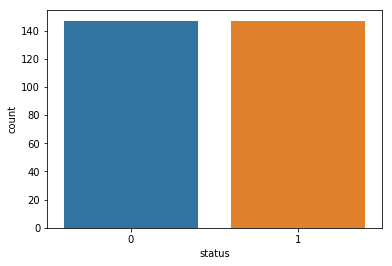

In [18]:
sns.countplot(df_up['status'])

C:\Users\hp\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


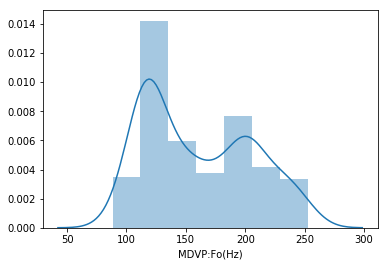

In [19]:
sns.distplot(df_up['MDVP:Fo(Hz)'])

C:\Users\hp\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


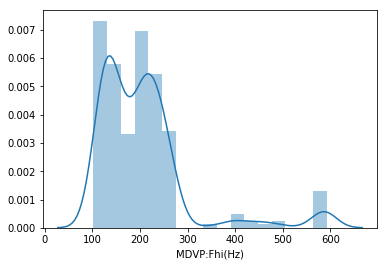

In [20]:
sns.distplot(df_up['MDVP:Fhi(Hz)'])

C:\Users\hp\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


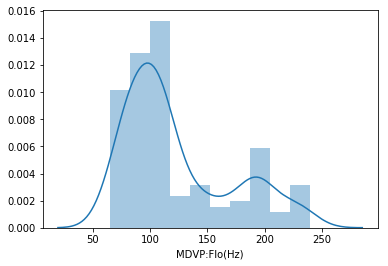

In [21]:
sns.distplot(df_up['MDVP:Flo(Hz)'])

C:\Users\hp\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


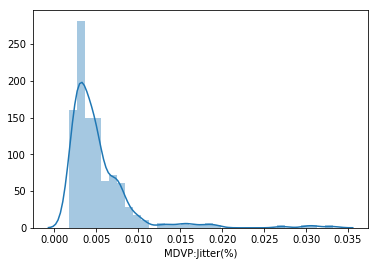

In [22]:
sns.distplot(df_up['MDVP:Jitter(%)'])

C:\Users\hp\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


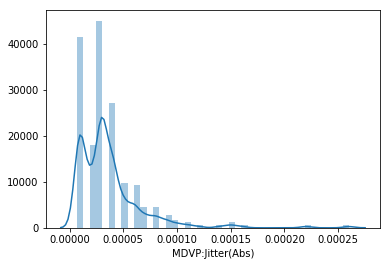

In [23]:
sns.distplot(df_up['MDVP:Jitter(Abs)'])

C:\Users\hp\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


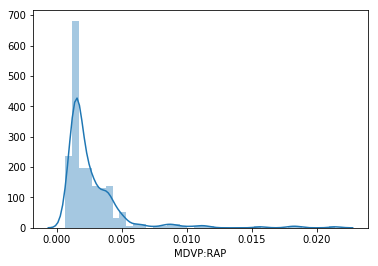

In [24]:
sns.distplot(df_up['MDVP:RAP'])

C:\Users\hp\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


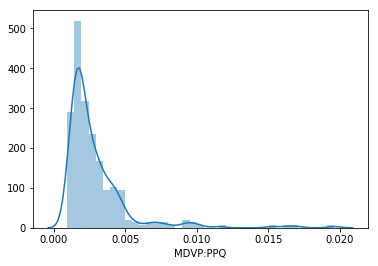

In [25]:
sns.distplot(df_up['MDVP:PPQ'])

C:\Users\hp\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


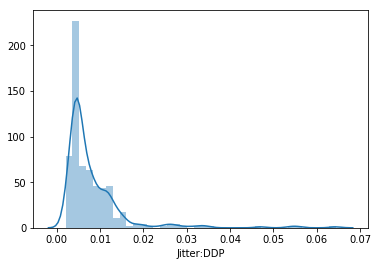

In [26]:
sns.distplot(df_up['Jitter:DDP'])

C:\Users\hp\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


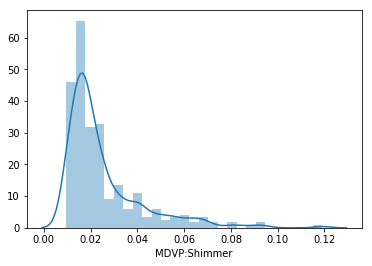

In [27]:
sns.distplot(df_up['MDVP:Shimmer'])

C:\Users\hp\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


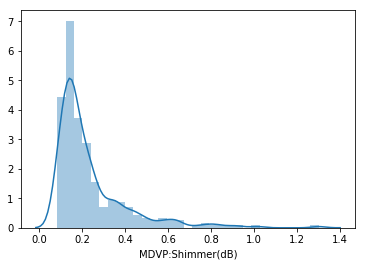

In [28]:
sns.distplot(df_up['MDVP:Shimmer(dB)'])

C:\Users\hp\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


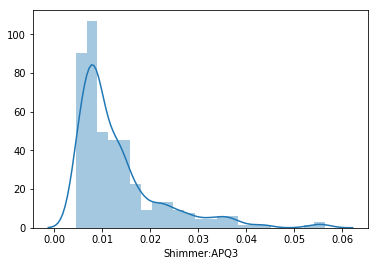

In [29]:
sns.distplot(df_up['Shimmer:APQ3'])

C:\Users\hp\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


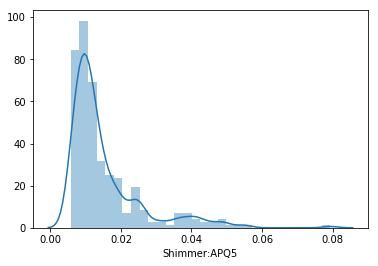

In [30]:
sns.distplot(df_up['Shimmer:APQ5'])

C:\Users\hp\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


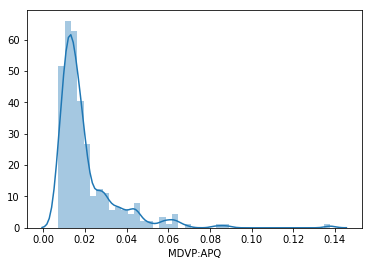

In [31]:
sns.distplot(df_up['MDVP:APQ'])

C:\Users\hp\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


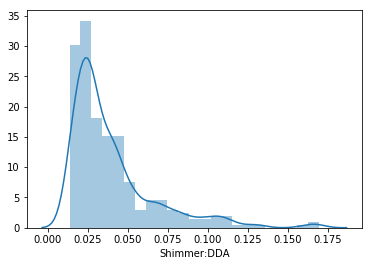

In [32]:
sns.distplot(df_up['Shimmer:DDA'])

C:\Users\hp\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


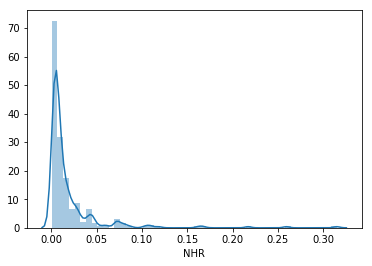

In [33]:
sns.distplot(df_up['NHR'])

C:\Users\hp\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


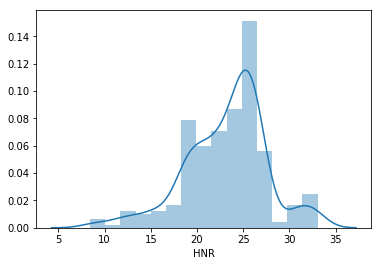

In [34]:
sns.distplot(df_up['HNR'])

C:\Users\hp\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


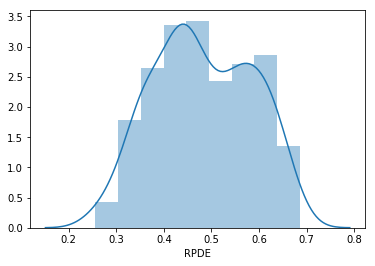

In [35]:
sns.distplot(df_up['RPDE'])

C:\Users\hp\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


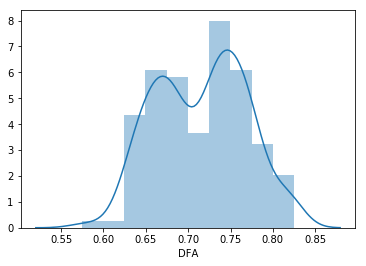

In [36]:
sns.distplot(df_up['DFA'])

C:\Users\hp\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


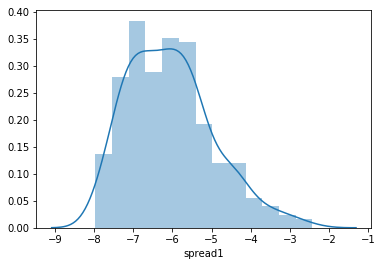

In [37]:
sns.distplot(df_up['spread1'])

C:\Users\hp\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


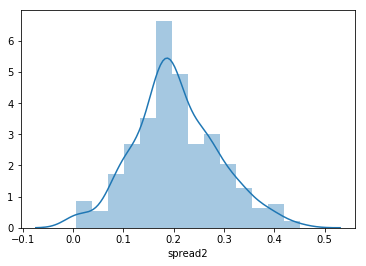

In [38]:
sns.distplot(df_up['spread2'])

C:\Users\hp\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


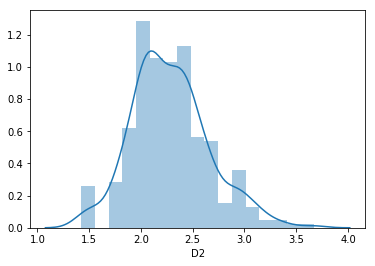

In [39]:
sns.distplot(df_up['D2'])

C:\Users\hp\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


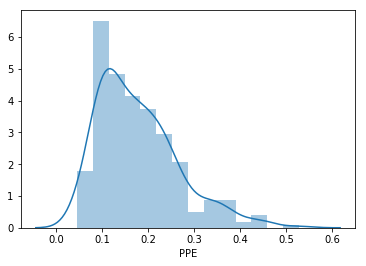

In [40]:
sns.distplot(df_up['PPE'])

Univariate Analysis
#Most of the graphs are right skewed except for PPE,D2,spread2,spread1,DFA,RPDE and HNR
#plot for HNR seems to be left skewed. 
Hence we can assume that there can be a good amount of outliers for the attributes having skewed distributions


<function matplotlib.pyplot.show(*args, **kw)>

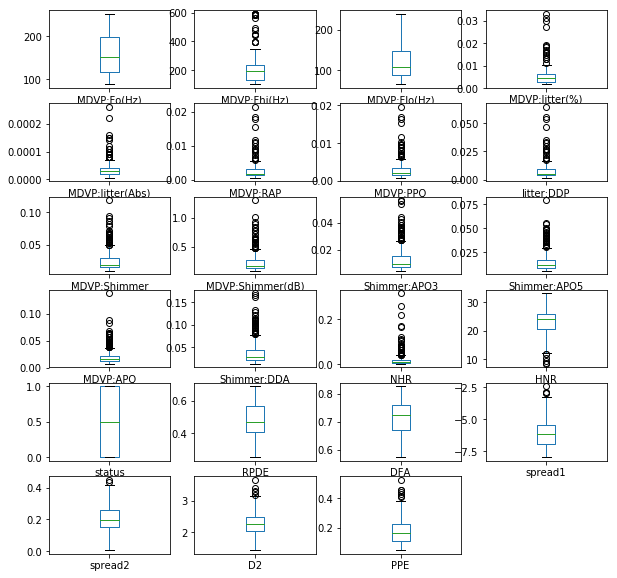

In [41]:
df_up.plot(kind='box',subplots=True,layout=(6,4))
plt.gcf().set_size_inches(10, 10)
plt.show


C:\Users\hp\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\hp\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\hp\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\hp\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


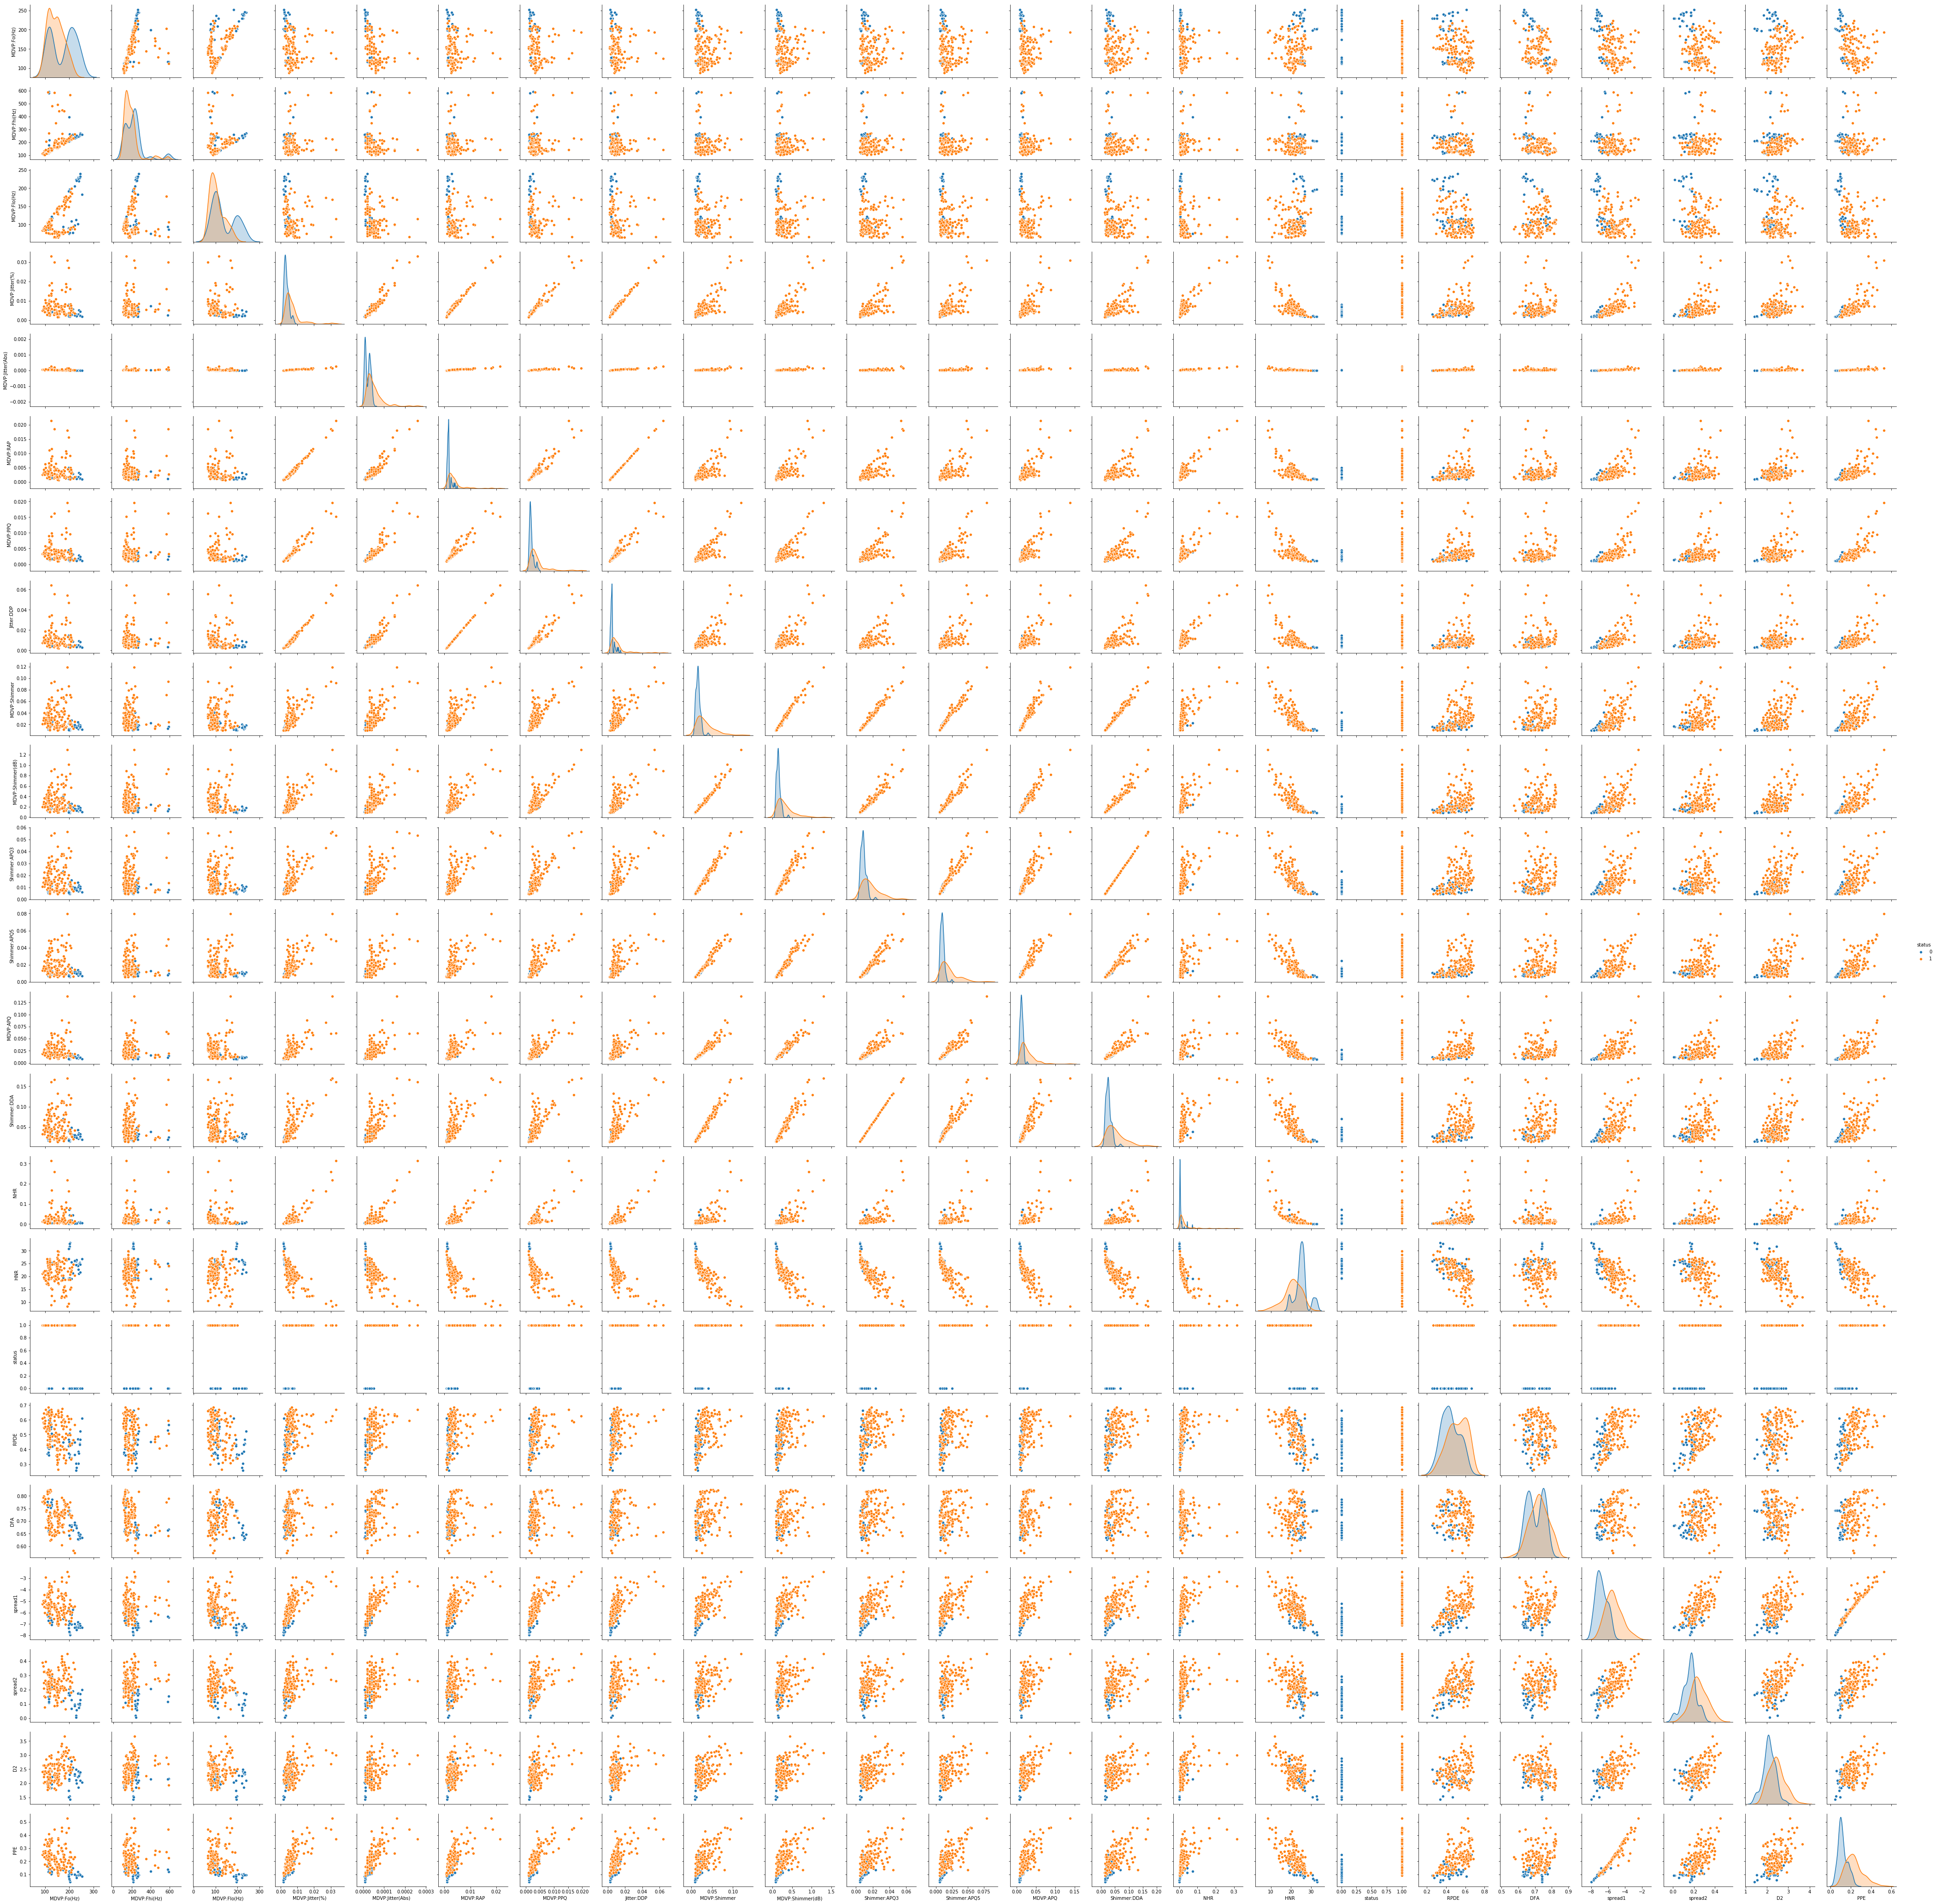

In [42]:
sns.pairplot(df_up, diag_kind='kde', hue='status')

Split the dataset into training and test set in the ratio of 70:30 (Training:Test)

In [65]:
#df_up.corr()

In [44]:
df_n = df_up.drop('name' , axis =1)
df_n.head(2)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674


In [45]:
from scipy.stats import zscore

df_scaled = df_n.apply(zscore)
df_scaled.head(2)


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,-0.898352,-0.479999,-1.038203,0.611356,1.087614,0.369832,1.098060,0.368485,1.100804,1.091282,...,0.939034,0.083707,-0.487319,1.0,-0.651211,1.889098,1.135859,0.747227,0.046341,1.222552
1,-0.844933,-0.567125,-0.201629,1.049702,1.411716,0.741139,1.691766,0.739792,2.147810,2.248848,...,1.989634,0.001544,-0.928137,1.0,-0.227516,1.968977,1.810044,1.576580,0.541099,2.181238


In [46]:
df_scaled.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.327670,0.600339,-0.184196,-0.443665,-0.114260,-0.165082,-0.114383,-0.150102,-0.130363,...,-0.135542,-0.047126,0.154365,-0.339571,-0.398384,-0.440448,-0.494380,-0.337517,0.101979,-0.446071
MDVP:Fhi(Hz),0.327670,1.000000,0.037964,0.056014,-0.063984,0.068386,0.052912,0.068295,-0.037634,-0.003321,...,-0.040555,0.146886,-0.024286,-0.166420,-0.040762,-0.404358,-0.128505,-0.110885,0.125543,-0.139040
MDVP:Flo(Hz),0.600339,0.037964,1.000000,-0.231603,-0.361058,-0.179089,-0.193193,-0.179111,-0.238382,-0.217660,...,-0.239918,-0.182713,0.375543,-0.350865,-0.415629,-0.019529,-0.485794,-0.268384,-0.178204,-0.425140
MDVP:Jitter(%),-0.184196,0.056014,-0.231603,1.000000,0.934111,0.987613,0.975466,0.987614,0.794542,0.824966,...,0.773576,0.900663,-0.738248,0.408681,0.386613,0.106538,0.709902,0.445901,0.468419,0.735330
MDVP:Jitter(Abs),-0.443665,-0.063984,-0.361058,0.934111,1.000000,0.910325,0.896950,0.910355,0.732653,0.742750,...,0.722545,0.816346,-0.678609,0.461459,0.470658,0.184689,0.769609,0.468097,0.364828,0.778926
MDVP:RAP,-0.114260,0.068386,-0.179089,0.987613,0.910325,1.000000,0.960841,1.000000,0.779804,0.807570,...,0.765283,0.915873,-0.722578,0.392299,0.346845,0.061351,0.657876,0.366692,0.463005,0.682883
MDVP:PPQ,-0.165082,0.052912,-0.193193,0.975466,0.896950,0.960841,1.000000,0.960848,0.813289,0.850037,...,0.780898,0.849516,-0.737284,0.412514,0.353764,0.166799,0.724883,0.439586,0.450519,0.773223
Jitter:DDP,-0.114383,0.068295,-0.179111,0.987614,0.910355,1.000000,0.960848,1.000000,0.779799,0.807557,...,0.765276,0.915871,-0.722561,0.392335,0.346812,0.061322,0.657962,0.366667,0.462981,0.682967
MDVP:Shimmer,-0.150102,-0.037634,-0.238382,0.794542,0.732653,0.779804,0.813289,0.779799,1.000000,0.989070,...,0.988890,0.732651,-0.824924,0.501045,0.434054,0.136721,0.682841,0.480017,0.558798,0.719613
MDVP:Shimmer(dB),-0.130363,-0.003321,-0.217660,0.824966,0.742750,0.807570,0.850037,0.807557,0.989070,1.000000,...,0.968168,0.755261,-0.817909,0.484741,0.406283,0.140362,0.678071,0.482031,0.558317,0.717349


Split the dataset into training and test set in the ratio of 70:30 (Training:Test).
Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)
Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)


Split the dataset into training and test set in the ratio of 70:30 (Training:Test).

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [48]:
X = df_scaled.drop('status', axis=1)

y = df_scaled.pop('status')

In [49]:
X.shape

(294, 22)

In [50]:
y.shape

(294,)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3 ,random_state=0)

In [52]:
X_train.shape

(205, 22)

In [53]:
y_test.shape

(89,)

Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)

In [54]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [55]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

 Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)

In [56]:
y_predict = dt_model.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.898876404494382

In [58]:
pd.crosstab(y_test,y_predict)

col_0,-1.0,1.0
status,,
-1.0,48,2
1.0,7,32


In [59]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_test, y_predict),
    columns=['predicted true', 'Predicted False'],
    index=['True', 'False']
)

,predicted true,Predicted False
True,48,2
False,7,32


Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points) 


In [60]:
for i in range(1,10):
    for j in range(1, 5):
        model = DecisionTreeClassifier(max_depth=i, min_samples_leaf=j ,random_state = 0, criterion='entropy')
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test)
        score = model.score(X_test, y_test)
        print('Accuracy for max_depth {} and min_sample_leaf {}'.format(i ,j) , score)
    

Accuracy for max_depth 1 and min_sample_leaf 1 0.7752808988764045
Accuracy for max_depth 1 and min_sample_leaf 2 0.7752808988764045
Accuracy for max_depth 1 and min_sample_leaf 3 0.7752808988764045
Accuracy for max_depth 1 and min_sample_leaf 4 0.7752808988764045
Accuracy for max_depth 2 and min_sample_leaf 1 0.7752808988764045
Accuracy for max_depth 2 and min_sample_leaf 2 0.7752808988764045
Accuracy for max_depth 2 and min_sample_leaf 3 0.7752808988764045
Accuracy for max_depth 2 and min_sample_leaf 4 0.7752808988764045
Accuracy for max_depth 3 and min_sample_leaf 1 0.8876404494382022
Accuracy for max_depth 3 and min_sample_leaf 2 0.8876404494382022
Accuracy for max_depth 3 and min_sample_leaf 3 0.8876404494382022
Accuracy for max_depth 3 and min_sample_leaf 4 0.8876404494382022
Accuracy for max_depth 4 and min_sample_leaf 1 0.8764044943820225
Accuracy for max_depth 4 and min_sample_leaf 2 0.8651685393258427
Accuracy for max_depth 4 and min_sample_leaf 3 0.8764044943820225
Accuracy f

In [61]:
# we can see that for change in the regularization parameters accuracy varies
# Regularization helps to avoid the problem of overfitting.

Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 40)
rf_model.fit(X_train, y_train)
y_predict = rf_model.predict(X_test)
score = rf_model.score(X_test, y_test)
print("Accuracy = ", score)

C:\Users\hp\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Accuracy =  0.9325842696629213


In [71]:

rf_model = RandomForestClassifier(n_estimators = 39)
rf_model.fit(X_train, y_train)
y_predict = rf_model.predict(X_test)
score = rf_model.score(X_test, y_test)
print("Accuracy = ", score)

Accuracy =  0.9550561797752809


In [ ]:
accuracies =[]
for i in range(1,100):
    rf_model = RandomForestClassifier(n_estimators = 100 )
    rf_model.fit(X_train, y_train)
    y_predict = rf_model.predict(X_test)
    score = rf_model.score(X_test, y_test)
    print("Accuracy for n_estimator as {0} = " .format(i), score)
    accuracies.append(score)


In [70]:
sorted(zip(accuracies, np.index_exp), reverse=True)[:5]

[(0.9550561797752809, (64,)),
 (0.9550561797752809, (57,)),
 (0.9550561797752809, (41,)),
 (0.9550561797752809, (38,)),
 (0.9438202247191011, (98,))]